In [1]:
'''Antes de importar usar esse cod -> !pip install import-ipynb'''

import import_ipynb # importar ele aqui
from collections import Counter
from __future__ import division
import matplotlib.pyplot as plt
from linear_algebra import sum_of_squares, dot
import math

importing Jupyter notebook from linear_algebra.ipynb
[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


In [2]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

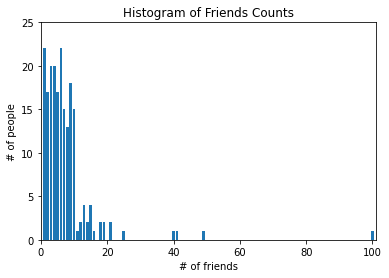

In [3]:
def make_friends_counts_histogram():
    
    friends_counts = Counter(num_friends)
    xs = range(101)
    ys = [friends_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25]) # x de 0 a 101 e y de 0 a 25
    plt.title('Histogram of Friends Counts')
    plt.xlabel('# of friends')
    plt.ylabel('# of people')
    plt.show()
    
make_friends_counts_histogram()

In [4]:
num_points = len(num_friends) # 204
#print(num_points)

In [5]:
larget_value = max(num_friends) # 100 -> maior valor
smallest_value = min(num_friends) # 1 -> menor valor
#print(larget_value, smallest_value)

In [6]:
sorted_values = sorted(num_friends) # Sorted deixa do menor pro maior
smallest_value = sorted_values[0]       # 1
second_smallest_value = sorted_values[1]# 1
second_larget_value = sorted_values[-2] # 49
#print(smallest_value, second_smallest_value, second_larget_value)

In [16]:
"""TENDENCIAS CENTRAIS"""

'TENDENCIAS CENTRAIS'

In [7]:
# this isn't right if you don't from __future__ import division
def mean(x):
    return sum(x) / len(x)

#print(mean(num_friends)) # 7.33333333333333333

7.333333333333333


In [8]:
def median(v):
    '''encontra o valor mais ao meio de v'''
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2 # // -> floor division -> divisão exata sem virgula
    
    if n % 2 == 1:
        # se for impar, retorna o valor do meio
        return sorted_v[midpoint] # o ultimo valor é o valor do meio, porém ele o inverte deixando na frente
    else:
        # se for par, retorna a média dos valores do meio
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
#print(median(num_friends)) #6.0

6.0


In [12]:
def quantile(x,p):
    '''retorna o valor percentual p-ésimo em x'''
    
    p_index = int(p * len(x))
    return sorted(x)[p_index]

#print(quantile(num_friends, 0.10))# 1
#print(quantile(num_friends, 0.25))# 3
#print(quantile(num_friends, 0.75))# 9
#print(quantile(num_friends, 0.90))# 13

In [15]:
def mode(x):
    '''Retorna uma lista, pode haver mais de uma moda'''
    
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
           if count == max_count]


#print(mode(num_friends)) # 6 and 1

In [17]:
"""Dispersão"""

'Dispersão'

In [18]:
# "Amplitude" já possui significado em Python, então usaremos um nome diferente
def data_range(x):
    return max(x) - min(x)

#print(data_range(num_friends)) # 99

99


In [19]:
def de_mean(x):
    '''Desloca x ao subtrair sua média (então o resultado tem a media 0)'''
    
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    '''presume que x tema ao menos dois elementos'''
    
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

#print(variance(num_friends)) # 81.54

81.54351395730716


In [20]:
def standard_deviation(x):
    return math.sqrt(variance(x))

#print(standard_deviation(num_friends)) # 9.03

9.03014473623248


In [21]:
'''Computa a diferença entre os percentos'''
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

#print(interquartile_range(num_friends)) #6

6


In [22]:
"""CORRELAÇÃO"""

'CORRELAÇÃO'

In [23]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [24]:
def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

#print(covariance(num_friends, daily_minutes))# 22.43

22.425435139573064


In [25]:
def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0 # Se não ouver amplitude, a correlação é zero
    
#print(correlation(num_friends, daily_minutes)) #0.25

0.24736957366478218


In [26]:
outlier = num_friends.index(100) # indice do valor discrepante

In [27]:
num_friends_good = [x
                   for i, x in enumerate(num_friends)
                   if i != outlier]

daily_minutes_good = [x
                     for i, x in enumerate(daily_minutes)
                     if i != outlier]

print(correlation(num_friends_good, daily_minutes_good)) # 0.57

0.5736792115665573


In [29]:
if __name__ == "__main__":

    print("num_points:", len(num_friends))
    print("largest value:", max(num_friends))
    print("smallest value:", min(num_friends))
    print("second_smallest_value:", sorted_values[1])
    print("second_largest_value:", sorted_values[-2]  )
    print("mean(num_friends):", mean(num_friends))
    print("median(num_friends):", median(num_friends))
    print("quantile(num_friends, 0.10):", quantile(num_friends, 0.10))
    print("quantile(num_friends, 0.25):", quantile(num_friends, 0.25))
    print("quantile(num_friends, 0.75):", quantile(num_friends, 0.75))
    print("quantile(num_friends, 0.90):", quantile(num_friends, 0.90))
    print("mode(num_friends):", mode(num_friends))
    print("data_range(num_friends):", data_range(num_friends))
    print("variance(num_friends):", variance(num_friends))
    print("standard_deviation(num_friends):", standard_deviation(num_friends))
    print("interquartile_range(num_friends):", interquartile_range(num_friends))

    print("covariance(num_friends, daily_minutes):", covariance(num_friends, daily_minutes))
    print("correlation(num_friends, daily_minutes):", correlation(num_friends, daily_minutes))
    print("correlation(num_friends_good, daily_minutes_good):", correlation(num_friends_good, daily_minutes_good))

num_points: 204
largest value: 100
smallest value: 1
second_smallest_value: 1
second_largest_value: 49
mean(num_friends): 7.333333333333333
median(num_friends): 6.0
quantile(num_friends, 0.10): 1
quantile(num_friends, 0.25): 3
quantile(num_friends, 0.75): 9
quantile(num_friends, 0.90): 13
mode(num_friends): [6, 1]
data_range(num_friends): 99
variance(num_friends): 81.54351395730716
standard_deviation(num_friends): 9.03014473623248
interquartile_range(num_friends): 6
covariance(num_friends, daily_minutes): 22.425435139573064
correlation(num_friends, daily_minutes): 0.24736957366478218
correlation(num_friends_good, daily_minutes_good): 0.5736792115665573
